In [47]:
import pandas as pd
import requests

In [134]:
url = "http://127.0.0.1:8090/api/collections/listing/records"

req = requests.get(url)

data = req.json()
pages = data["totalPages"]
items = data["items"]

for i in range(1,pages):
    req = requests.get(url+"?page={}".format(i))
    data = req.json()
    items = items + data["items"]

In [78]:
df = pd.DataFrame(items)
df["price"] = df["price"].apply(lambda p: int(p.replace('$', '').replace(',', '')))
df = df[["title", "price"]]

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3282 entries, 1468 to 2838
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   3282 non-null   object
 1   price   3282 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 76.9+ KB


In [136]:
df = df[df["price"] != 0]
df = df.sort_values("price", ascending=False)

In [137]:
make = "Toyota"
tdf = df[df["title"].str.contains(make, case=False)]

In [138]:
tdf

,title,price
1511,2019 Toyota 4Runner SR5 Premium / 4X4 / Power ...,353995
1064,2019 Toyota 4Runner SR5 Premium / 4X4 / Power ...,353995
1468,2019 Toyota 4Runner SR5 Premium / 4X4 / Power ...,353995
1450,2021 Toyota Tundra Army Green *SAVE $$$*,56988
3083,2021 Toyota Tundra Army Green *SAVE $$$*,56988
...,...,...
141,Toyota Camry,3299
481,Toyota Camry,3299
1427,">>> $2,500 DOWN *** 2010 TOYOTA TUNDRA SR5 ***...",2500
2824,">>> $2,500 DOWN *** 2010 TOYOTA TUNDRA SR5 ***...",2500


<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 1450 to 2071
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   305 non-null    object
 1   price   305 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.1+ KB


<Axes: ylabel='Frequency'>

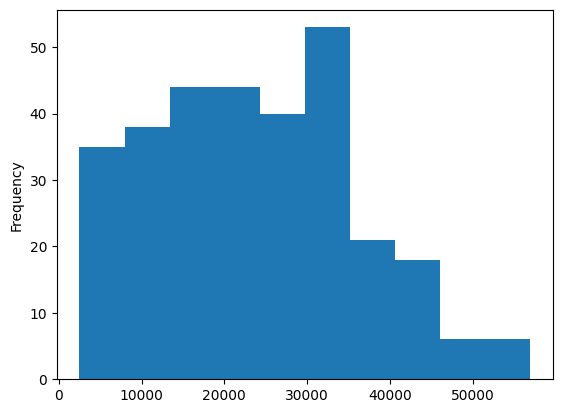

In [139]:
tdf = tdf[tdf["price"] <= 100000]
tdf.info()
tdf["price"].plot(kind="hist",bins=10)